In [6]:
from google.colab import files
uploaded = files.upload()


Saving 43RDM_test_data.csv to 43RDM_test_data (1).csv


KeyboardInterrupt: ignored

In [7]:
import pandas as pd
import numpy as np
import missingno as msn
df_fea = pd.read_csv('43RDM_test data.csv')
# df_lab = pd.read_csv('43REL_train_labels.csv')

FileNotFoundError: ignored

In [0]:
print(df_fea.head())
# print(df_lab.head())
df_fea.rename(columns={"lon": "lng"}, inplace = True)
  

   fcc_cluster_segments          x  ...  b8_2019-04-28  ndvi_2019-04-28
0                   1.0  74.805893  ...            0.0              NaN
1                   2.0  74.810617  ...            0.0              NaN
2                  10.0  74.829130  ...            0.0              NaN
3                  14.0  74.837229  ...            0.0              NaN
4                  19.0  74.844556  ...            0.0              NaN

[5 rows x 141 columns]


In [0]:
print(df_fea.shape)
# print(df_lab.shape)

(3741, 141)


In [0]:
#Removing -999 values 
df_fea.replace({-999.0: np.nan}, inplace = True)
df_fea.dropna(inplace = True)
#After dropping all the NaN values
df_fea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3080 entries, 51 to 3739
Columns: 141 entries, fcc_cluster_segments to ndvi_2019-04-28
dtypes: float64(141)
memory usage: 3.3 MB


In [0]:
df_fea.to_csv('/content/new_file.csv', index = None)

In [0]:
df_fea.head()

,fcc_cluster_segments,x,y,b4_2018-09-05,b8_2018-09-05,ndvi_2018-09-05,b4_2018-09-10,b8_2018-09-10,ndvi_2018-09-10,b4_2018-09-20,b8_2018-09-20,ndvi_2018-09-20,b4_2018-09-25,b8_2018-09-25,ndvi_2018-09-25,b4_2018-09-30,b8_2018-09-30,ndvi_2018-09-30,b4_2018-10-05,b8_2018-10-05,ndvi_2018-10-05,b4_2018-10-10,b8_2018-10-10,ndvi_2018-10-10,b4_2018-10-15,b8_2018-10-15,ndvi_2018-10-15,b4_2018-10-20,b8_2018-10-20,ndvi_2018-10-20,b4_2018-10-25,b8_2018-10-25,ndvi_2018-10-25,b4_2018-10-30,b8_2018-10-30,ndvi_2018-10-30,b4_2018-11-04,b8_2018-11-04,ndvi_2018-11-04,b4_2018-11-09,...,ndvi_2019-02-22,b4_2019-02-27,b8_2019-02-27,ndvi_2019-02-27,b4_2019-03-04,b8_2019-03-04,ndvi_2019-03-04,b4_2019-03-09,b8_2019-03-09,ndvi_2019-03-09,b4_2019-03-14,b8_2019-03-14,ndvi_2019-03-14,b4_2019-03-19,b8_2019-03-19,ndvi_2019-03-19,b4_2019-03-24,b8_2019-03-24,ndvi_2019-03-24,b4_2019-03-29,b8_2019-03-29,ndvi_2019-03-29,b4_2019-04-03,b8_2019-04-03,ndvi_2019-04-03,b4_2019-04-08,b8_2019-04-08,ndvi_2019-04-08,b4_2019-04-13,b8_2019-04-13,ndvi_2019-04-13,b4_2019-04-18,b8_2019-04-18,ndvi_2019-04-18,b4_2019-04-23,b8_2019-04-23,ndvi_2019-04-23,b4_2019-04-28,b8_2019-04-28,ndvi_2019-04-28
51,100.0,75.063616,28.927945,3960.0,4793.0,0.095167,4147.0,4558.0,0.047214,1891.0,2926.0,0.214864,1532.0,2588.0,0.256311,1728.0,2533.0,0.188923,1790.0,2665.0,0.196409,1911.0,2597.0,0.152174,1880.0,2720.0,0.182609,1892.0,2574.0,0.152709,1951.0,2602.0,0.142983,2373.0,2537.0,0.033401,1871.0,2461.0,0.136196,2177.0,...,0.368814,2484.0,2742.0,0.049369,1365.0,1567.0,0.068895,1791.0,2393.0,0.143881,1441.0,2224.0,0.213643,1822.0,2504.0,0.157651,1856.0,2646.0,0.175478,2163.0,2570.0,0.085992,2254.0,2713.0,0.092410,2235.0,2559.0,0.067584,2469.0,2854.0,0.072328,2301.0,2632.0,0.067099,2449.0,2821.0,0.070588,2492.0,2843.0,0.065792
52,101.0,75.064676,28.928138,3707.0,4780.0,0.126429,3957.0,4457.0,0.059425,2116.0,3105.0,0.189427,1384.0,1922.0,0.162734,1833.0,2659.0,0.183882,1753.0,2591.0,0.192910,1926.0,2582.0,0.145519,1805.0,2647.0,0.189128,2315.0,2757.0,0.087145,2437.0,2888.0,0.084695,2474.0,2637.0,0.031892,2522.0,2957.0,0.079394,2541.0,...,0.117691,2527.0,2719.0,0.036599,1514.0,1641.0,0.040254,2474.0,3006.0,0.097080,1780.0,2186.0,0.102370,2451.0,2869.0,0.078571,2483.0,2874.0,0.072989,2673.0,3003.0,0.058140,2660.0,3016.0,0.062720,2359.0,2599.0,0.048407,2742.0,2961.0,0.038401,2523.0,2733.0,0.039954,2724.0,2958.0,0.041183,2750.0,3006.0,0.044475
103,159.0,74.613734,28.927367,1682.0,2786.0,0.247090,6166.0,6452.0,0.022666,1284.0,2481.0,0.317928,1136.0,2187.0,0.316280,1214.0,2517.0,0.349236,1209.0,2426.0,0.334801,1300.0,2459.0,0.308327,1296.0,2427.0,0.303787,1450.0,1986.0,0.155995,1269.0,1598.0,0.114754,1592.0,2503.0,0.222466,1333.0,1464.0,0.046836,1785.0,...,0.275298,1103.0,1428.0,0.128408,6008.0,6129.0,0.009970,862.0,1275.0,0.193262,1247.0,1931.0,0.215230,1390.0,1877.0,0.149066,1534.0,2274.0,0.194328,1325.0,1598.0,0.093397,1471.0,1856.0,0.115720,1440.0,1539.0,0.033233,2197.0,2452.0,0.054851,1236.0,1359.0,0.047399,1933.0,2263.0,0.078646,1774.0,1893.0,0.032452
134,206.0,75.054263,28.927270,3915.0,5111.0,0.132506,4685.0,4961.0,0.028613,1868.0,2781.0,0.196386,1757.0,2919.0,0.248503,1632.0,2579.0,0.224887,1746.0,2804.0,0.232527,1827.0,2584.0,0.171616,1826.0,2882.0,0.224299,1716.0,2422.0,0.170614,1729.0,2497.0,0.181732,2388.0,2589.0,0.040386,1726.0,2473.0,0.177899,2233.0,...,0.128205,2999.0,2944.0,-0.009255,2823.0,3128.0,0.051252,1834.0,2360.0,0.125417,1615.0,1986.0,0.103027,1934.0,2355.0,0.098158,2129.0,2544.0,0.088808,2143.0,2559.0,0.088473,2154.0,2636.0,0.100626,2221.0,2528.0,0.064645,2420.0,2710.0,0.056530,2183.0,2496.0,0.066895,2304.0,2672.0,0.073955,2469.0,2784.0,0.059966
161,238.0,74.921883,28.927367,2736.0,3214.0,0.080336,2904.0,3574.0,0.103427,1687.0,2405.0,0.175464,1147.0,1366.0,0.087147,1568.0,2286.0,0.186300,1634.0,2236.0,0.155556,1855.0,2386.0,0.125206,1801.0,2340.0,0.130162,1756.0,2275.0,0.128752,1787.0,2372.0,0.140659,2410.0,2528.0,0.023896,1673.0,2208.0,0.137851,2266.0,...,0.165899,2788.0,2925.0,0.

In [0]:
df_merge_col = pd.merge(df_fea, df_lab, on=['lng','lat'], how = 'inner')


In [0]:
df_merge_col.head()
df_merge_col.shape

(576, 341)

In [0]:
df_merge_col.to_csv('/content/new_train_file.csv', index = None)

In [0]:
df_merge_col

,lng,lat,b4_2018-08-01,b8_2018-08-01,ndvi_2018-08-01,b4_2018-08-03,b8_2018-08-03,ndvi_2018-08-03,b4_2018-08-06,b8_2018-08-06,ndvi_2018-08-06,b4_2018-08-08,b8_2018-08-08,ndvi_2018-08-08,b4_2018-08-11,b8_2018-08-11,ndvi_2018-08-11,b4_2018-08-13,b8_2018-08-13,ndvi_2018-08-13,b4_2018-08-16,b8_2018-08-16,ndvi_2018-08-16,b4_2018-08-18,b8_2018-08-18,ndvi_2018-08-18,b4_2018-08-21,b8_2018-08-21,ndvi_2018-08-21,b4_2018-08-23,b8_2018-08-23,ndvi_2018-08-23,b4_2018-08-26,b8_2018-08-26,ndvi_2018-08-26,b4_2018-08-28,b8_2018-08-28,ndvi_2018-08-28,b4_2018-08-31,b8_2018-08-31,...,ndvi_2019-04-10,b4_2019-04-13,b8_2019-04-13,ndvi_2019-04-13,b4_2019-04-15,b8_2019-04-15,ndvi_2019-04-15,b4_2019-04-18,b8_2019-04-18,ndvi_2019-04-18,b4_2019-04-20,b8_2019-04-20,ndvi_2019-04-20,b4_2019-04-23,b8_2019-04-23,ndvi_2019-04-23,b4_2019-04-25,b8_2019-04-25,ndvi_2019-04-25,b4_2019-04-28,b8_2019-04-28,ndvi_2019-04-28,b4_2019-04-30,b8_2019-04-30,ndvi_2019-04-30,Unnamed: 0,index,season,year,state,distrct,lvl_4_n,level_4,cc_plt_,cc_r_nt,dt_f_sw,dt_f_ct,dt_f_hr,crop_nm,Name
0,75.511250,27.412203,1051.0,3761.0,0.563175,1865.0,3791.0,0.340523,6497.0,7150.0,0.047849,6007.0,6407.0,0.032222,5093.0,5796.0,0.064561,8105.0,8150.0,0.002768,4641.0,5523.0,0.086777,875.0,1806.0,0.347258,1632.0,2573.0,0.223781,6564.0,6744.0,0.013526,2793.0,3665.0,0.135026,3620.0,4239.0,0.078763,2246.0,3355.0,...,0.113228,1858.0,2279.0,0.101765,2682.0,3021.0,0.059442,4968.0,5380.0,0.039814,2113.0,2724.0,0.126318,1855.0,2399.0,0.127880,2128.0,2662.0,0.111482,1923.0,2424.0,0.115252,2166.0,2752.0,0.119154,160,2652,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.30,Hectare,2018-11-18,2019-04-03,2019-04-30,Wheat,43REL
1,75.511250,27.412203,1051.0,3761.0,0.563175,1865.0,3791.0,0.340523,6497.0,7150.0,0.047849,6007.0,6407.0,0.032222,5093.0,5796.0,0.064561,8105.0,8150.0,0.002768,4641.0,5523.0,0.086777,875.0,1806.0,0.347258,1632.0,2573.0,0.223781,6564.0,6744.0,0.013526,2793.0,3665.0,0.135026,3620.0,4239.0,0.078763,2246.0,3355.0,...,0.113228,1858.0,2279.0,0.101765,2682.0,3021.0,0.059442,4968.0,5380.0,0.039814,2113.0,2724.0,0.126318,1855.0,2399.0,0.127880,2128.0,2662.0,0.111482,1923.0,2424.0,0.115252,2166.0,2752.0,0.119154,162,2654,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.40,Hectare,2018-11-22,2019-04-03,2019-04-30,Wheat,43REL
2,75.511250,27.412203,1051.0,3761.0,0.563175,1865.0,3791.0,0.340523,6497.0,7150.0,0.047849,6007.0,6407.0,0.032222,5093.0,5796.0,0.064561,8105.0,8150.0,0.002768,4641.0,5523.0,0.086777,875.0,1806.0,0.347258,1632.0,2573.0,0.223781,6564.0,6744.0,0.013526,2793.0,3665.0,0.135026,3620.0,4239.0,0.078763,2246.0,3355.0,...,0.113228,1858.0,2279.0,0.101765,2682.0,3021.0,0.059442,4968.0,5380.0,0.039814,2113.0,2724.0,0.126318,1855.0,2399.0,0.127880,2128.0,2662.0,0.111482,1923.0,2424.0,0.115252,2166.0,2752.0,0.119154,160,2652,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.30,Hectare,2018-11-18,2019-04-03,2019-04-30,Wheat,43REL
3,75.511250,27.412203,1051.0,3761.0,0.563175,1865.0,3791.0,0.340523,6497.0,7150.0,0.047849,6007.0,6407.0,0.032222,5093.0,5796.0,0.064561,8105.0,8150.0,0.002768,4641.0,5523.0,0.086777,875.0,1806.0,0.347258,1632.0,2573.0,0.223781,6564.0,6744.0,0.013526,2793.0,3665.0,0.135026,3620.0,4239.0,0.078763,2246.0,3355.0,...,0.113228,1858.0,2279.0,0.101765,2682.0,3021.0,0.059442,4968.0,5380.0,0.039814,2113.0,2724.0,0.126318,1855.0,2399.0,0.127880,2128.0,2662.0,0.111482,1923.0,2424.0,0.115252,2166.0,2752.0,0.119154,162,2654,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.40,Hectare,2018-11-22,2019-04-03,2019-04-30,Wheat,43REL
4,75.511250,27.412199,1051.0,3761.0,0.563175,1865.0,3791.0,0.340523,6497.0,7150.0,0.047849,6007.0,6407.0,0.032222,5093.0,5796.0,0.064561,8105.0,8150.0,0.002768,4641.0,5523.0,0.086777,875.0,1806.0,0.347258,1632.0,2573.0,0.223781,6564.0,6744.0,0.013526,2793.0,3665.0,0.135026,3620.0,4239.0,0.078763,2246.0,3355.0,...,0.113228,1858.0,2279.0,0.101765,2682.0,3021.0,0.059442,4968.0,5380.0,0.039814,2113.0,2724.0,0.126318,1855.0,2399.0,0.127880,2128.0,2662.0,0.111482,1923.0,2424.0,0.11525

In [0]:
#Dropping columns based on initials
b48 = [col for col in df_merge_col if (col.startswith('b4') or col.startswith('b8')) ]

df = df_merge_col.drop(b48 , axis = 1)
df.head()


#Writing file
df.to_csv('/content/df.csv')

In [0]:
#Basic EDA on training data
print(df.shape)
print(df.columns)


(576, 125)
Index(['lng', 'lat', 'ndvi_2018-08-01', 'ndvi_2018-08-03', 'ndvi_2018-08-06',
       'ndvi_2018-08-08', 'ndvi_2018-08-11', 'ndvi_2018-08-13',
       'ndvi_2018-08-16', 'ndvi_2018-08-18',
       ...
       'distrct', 'lvl_4_n', 'level_4', 'cc_plt_', 'cc_r_nt', 'dt_f_sw',
       'dt_f_ct', 'dt_f_hr', 'crop_nm', 'Name'],
      dtype='object', length=125)


In [0]:
#Number of ndvi values we have
ndvi = [col for col in df if col.startswith('ndvi')]
print(ndvi)
print(len(ndvi))

['ndvi_2018-08-01', 'ndvi_2018-08-03', 'ndvi_2018-08-06', 'ndvi_2018-08-08', 'ndvi_2018-08-11', 'ndvi_2018-08-13', 'ndvi_2018-08-16', 'ndvi_2018-08-18', 'ndvi_2018-08-21', 'ndvi_2018-08-23', 'ndvi_2018-08-26', 'ndvi_2018-08-28', 'ndvi_2018-08-31', 'ndvi_2018-09-02', 'ndvi_2018-09-05', 'ndvi_2018-09-07', 'ndvi_2018-09-10', 'ndvi_2018-09-12', 'ndvi_2018-09-17', 'ndvi_2018-09-20', 'ndvi_2018-09-22', 'ndvi_2018-09-25', 'ndvi_2018-09-27', 'ndvi_2018-09-30', 'ndvi_2018-10-02', 'ndvi_2018-10-05', 'ndvi_2018-10-07', 'ndvi_2018-10-10', 'ndvi_2018-10-12', 'ndvi_2018-10-15', 'ndvi_2018-10-17', 'ndvi_2018-10-20', 'ndvi_2018-10-22', 'ndvi_2018-10-25', 'ndvi_2018-10-27', 'ndvi_2018-10-30', 'ndvi_2018-11-01', 'ndvi_2018-11-04', 'ndvi_2018-11-06', 'ndvi_2018-11-09', 'ndvi_2018-11-11', 'ndvi_2018-11-14', 'ndvi_2018-11-16', 'ndvi_2018-11-19', 'ndvi_2018-11-21', 'ndvi_2018-11-24', 'ndvi_2018-11-26', 'ndvi_2018-11-29', 'ndvi_2018-12-01', 'ndvi_2018-12-04', 'ndvi_2018-12-06', 'ndvi_2018-12-09', 'ndvi_2018-

In [0]:
print(df.describe())



              lng         lat  ...    year     cc_plt_
count  576.000000  576.000000  ...   576.0  576.000000
mean    75.520018   27.572697  ...  2018.0    0.670692
std      0.174537    0.121726  ...     0.0    0.980910
min     75.148190   27.367893  ...  2018.0    0.020000
25%     75.390645   27.467825  ...  2018.0    0.220000
50%     75.537100   27.555302  ...  2018.0    0.400000
75%     75.663037   27.647686  ...  2018.0    0.700000
max     75.801290   27.884317  ...  2018.0   14.000000

[8 rows x 114 columns]


In [0]:
print(df.crop_nm.unique())
l = df.groupby(['crop_nm']).count()
print(l)

['Wheat' 'Barley (Jau)' 'Bengal Gram (Chana)' 'Mustard'
 'Methi (Fenugreek)']
                     lng  lat  ndvi_2018-08-01  ...  dt_f_ct  dt_f_hr  Name
crop_nm                                         ...                        
Barley (Jau)         128  128              128  ...      128      128   128
Bengal Gram (Chana)   89   89               89  ...       89       89    89
Methi (Fenugreek)     36   36               36  ...       36       36    36
Mustard               80   80               80  ...       80       80    80
Wheat                243  243              243  ...      243      243   243

[5 rows x 124 columns]


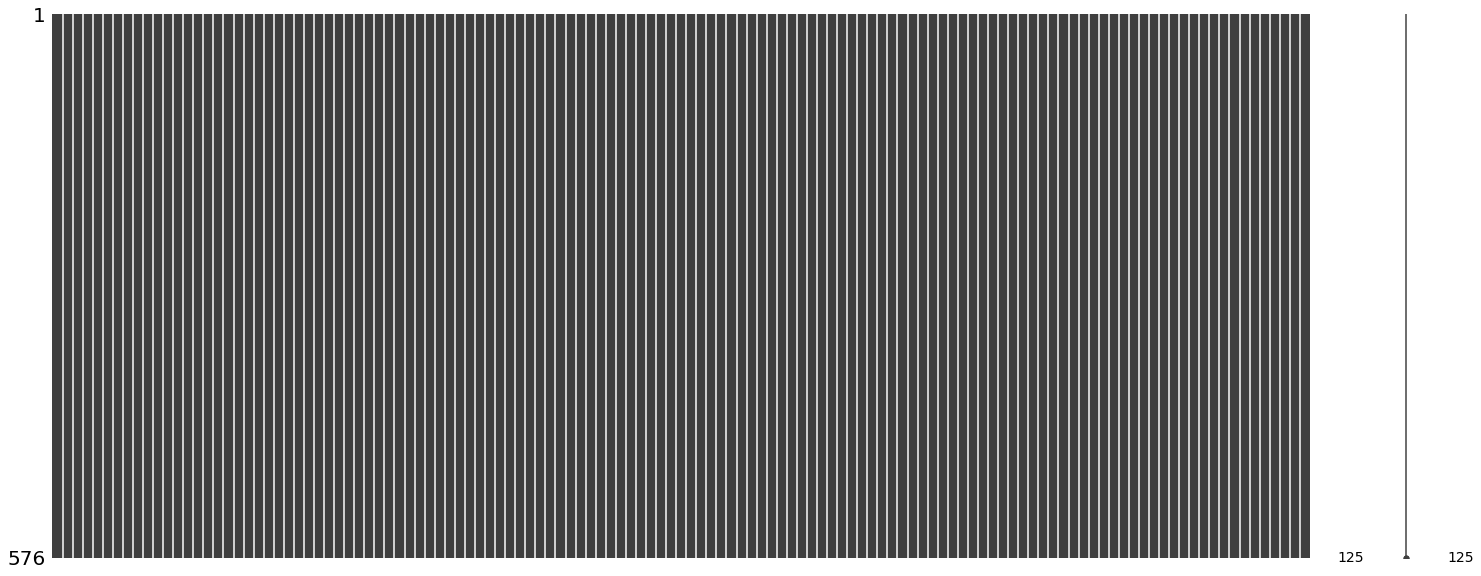

In [0]:
import missingno as mn
mn.matrix(df)

In [0]:
#crop = df.crop_nm.unique()
plt.bar(l.index,l['index'], )
plt.xticks(rotation=70)
plt.title("Distribution of Crops")

NameError: ignored